In [2]:
# Cloning shrinkai
!git clone https://github.com/nikshrimali/shrinkai

Cloning into 'shrinkai'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38 (delta 8), reused 23 (delta 2), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [3]:
# Importing Libraries
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from shrinkai.model.model7 import Net
from shrinkai.model.model_test import model_testing
from shrinkai.model.model_train import model_training

from shrinkai.data_process.getdata import GetCIFAR10_TrainData
from shrinkai.data_process.misclassified_data import *

import matplotlib.pyplot as plt
%matplotlib inline

device = "cuda" if torch.cuda.is_available else "cpu"
print(device)

cuda


In [4]:
# Importing Model and printing Summary
model = Net().to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 34, 34]             896
              ReLU-2           [-1, 32, 34, 34]               0
       BatchNorm2d-3           [-1, 32, 34, 34]              64
           Dropout-4           [-1, 32, 34, 34]               0
            Conv2d-5           [-1, 64, 36, 36]          18,496
              ReLU-6           [-1, 64, 36, 36]               0
       BatchNorm2d-7           [-1, 64, 36, 36]             128
           Dropout-8           [-1, 64, 36, 36]               0
         MaxPool2d-9           [-1, 64, 19, 19]               0
           Conv2d-10           [-1, 64, 21, 21]          36,928
             ReLU-11           [-1, 64, 21, 21]               0
      BatchNorm2d-12           [-1, 64, 21, 21]             128
          Dropout-13           [-1, 64, 21, 21]               0
           Conv2d-14          [-1, 128,

In [5]:
# Downloading the dataset and applying transformations

data = GetCIFAR10_TrainData(os.chdir(".."))
trainset = data.download_train_data()
testset = data.download_test_data()
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=4)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [10]:
# Training the model

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_acc = []
train_losses = []
test_acc = []
test_losses = []

EPOCHS = 15

for i in range(EPOCHS):
    print(f'EPOCHS : {i}')
    model_training(model, device, trainloader, optimizer, train_acc, train_losses, l1_loss=False)
    misclassified = model_testing(model, device, testloader, test_acc, test_losses)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCHS : 0


Loss=0.9466248750686646 Batch_id=195 Accuracy=62.03: 100%|██████████| 196/196 [00:28<00:00,  6.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.0905, Accuracy: 6070/10000 (60.70%)

EPOCHS : 1


Loss=0.8861991167068481 Batch_id=195 Accuracy=68.46: 100%|██████████| 196/196 [00:28<00:00,  6.86it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8966, Accuracy: 6828/10000 (68.28%)

EPOCHS : 2


Loss=0.7123156785964966 Batch_id=195 Accuracy=72.72: 100%|██████████| 196/196 [00:28<00:00,  6.90it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8132, Accuracy: 7166/10000 (71.66%)

EPOCHS : 3


Loss=0.616707444190979 Batch_id=195 Accuracy=76.00: 100%|██████████| 196/196 [00:28<00:00,  6.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7383, Accuracy: 7429/10000 (74.29%)

EPOCHS : 4


Loss=0.48676905035972595 Batch_id=195 Accuracy=78.04: 100%|██████████| 196/196 [00:28<00:00,  6.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7849, Accuracy: 7279/10000 (72.79%)

EPOCHS : 5


Loss=0.7658727169036865 Batch_id=195 Accuracy=80.05: 100%|██████████| 196/196 [00:28<00:00,  6.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6564, Accuracy: 7786/10000 (77.86%)

EPOCHS : 6


Loss=0.3980991840362549 Batch_id=195 Accuracy=81.62: 100%|██████████| 196/196 [00:28<00:00,  6.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7059, Accuracy: 7642/10000 (76.42%)

EPOCHS : 7


Loss=0.43109196424484253 Batch_id=195 Accuracy=83.09: 100%|██████████| 196/196 [00:28<00:00,  6.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6156, Accuracy: 7933/10000 (79.33%)

EPOCHS : 8


Loss=0.3186585605144501 Batch_id=195 Accuracy=84.07: 100%|██████████| 196/196 [00:28<00:00,  6.90it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6002, Accuracy: 7995/10000 (79.95%)

EPOCHS : 9


Loss=0.47882047295570374 Batch_id=195 Accuracy=85.31: 100%|██████████| 196/196 [00:28<00:00,  6.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6032, Accuracy: 8023/10000 (80.23%)

EPOCHS : 10


Loss=0.563040554523468 Batch_id=195 Accuracy=86.17: 100%|██████████| 196/196 [00:28<00:00,  6.90it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6775, Accuracy: 7782/10000 (77.82%)

EPOCHS : 11


Loss=0.27048543095588684 Batch_id=195 Accuracy=87.02: 100%|██████████| 196/196 [00:28<00:00,  6.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6113, Accuracy: 8029/10000 (80.29%)

EPOCHS : 12


Loss=0.3222910761833191 Batch_id=195 Accuracy=87.75: 100%|██████████| 196/196 [00:28<00:00,  6.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5961, Accuracy: 8090/10000 (80.90%)

EPOCHS : 13


Loss=0.34898313879966736 Batch_id=195 Accuracy=88.59: 100%|██████████| 196/196 [00:28<00:00,  6.90it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6089, Accuracy: 8108/10000 (81.08%)

EPOCHS : 14


Loss=0.13724449276924133 Batch_id=195 Accuracy=89.07: 100%|██████████| 196/196 [00:28<00:00,  6.88it/s]



Test set: Average loss: 0.6094, Accuracy: 8107/10000 (81.07%)



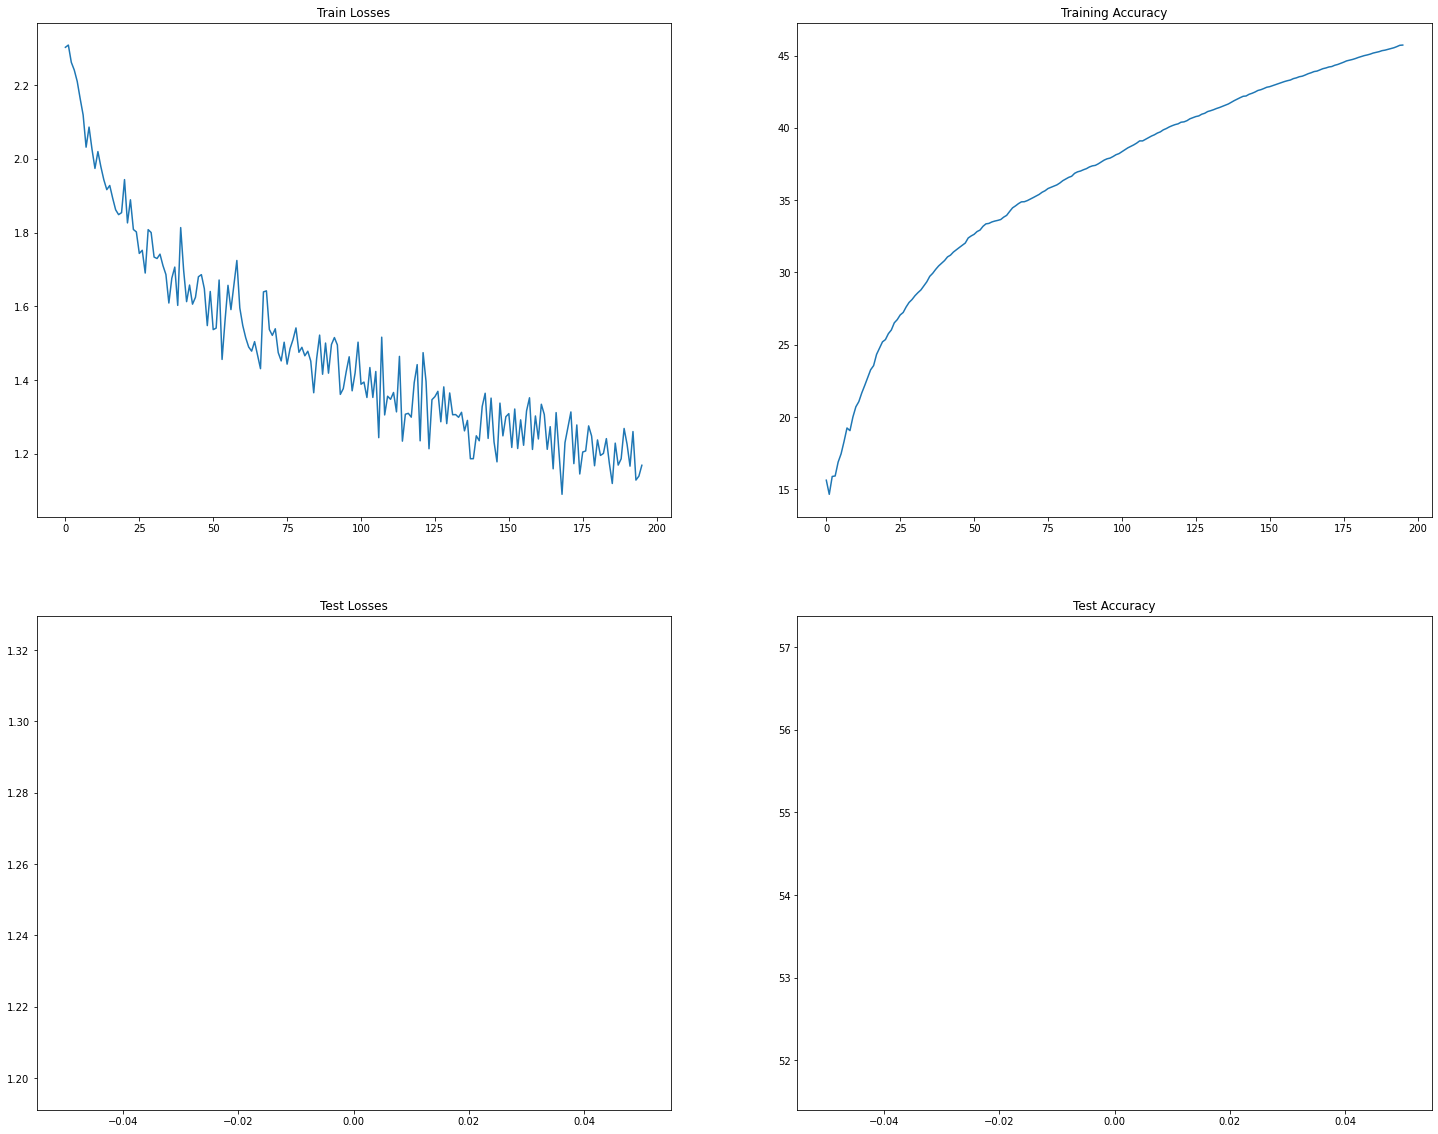

In [8]:

fig, axs = plt.subplots(2,2, figsize=(25,20))

axs[0,0].set_title('Train Losses')
axs[0,1].set_title('Training Accuracy')
axs[1,0].set_title('Test Losses')
axs[1,1].set_title('Test Accuracy')

axs[0,0].plot(train_losses)
axs[0,1].plot(train_acc)
axs[1,0].plot(test_losses)
axs[1,1].plot(test_acc)

# axs[0,0].legend(list_modes)
# axs[0,1].legend(list_modes)
# axs[1,0].legend(list_modes)
# axs[1,1].legend(list_modes)
# fig.savefig(os.path.join(img_dir, 'metrics.png'))